In [1]:
% matplotlib inline
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
# 收集数据
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

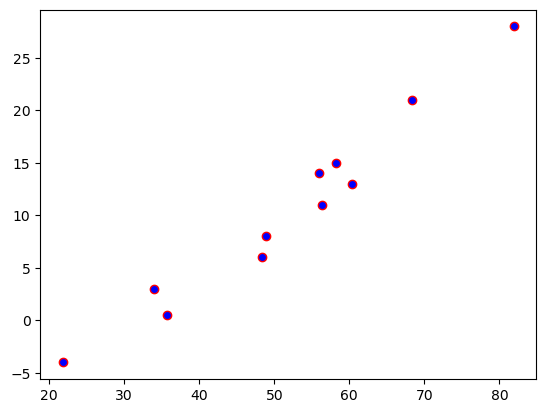

In [3]:
# 查看数据
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(t_u, t_c, c='b', edgecolors='r')
plt.show()

In [4]:
# 定义模型
def model(t_u, w, b):
    return w * t_u + b

In [5]:
# 损失函数
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [9]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor(0.)

In [8]:
w

tensor(1.)

In [11]:
# 计算损失
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [12]:
w = torch.zeros(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
loss = loss_fn(t_p, t_c)
loss

tensor(187.3864)